# Linear regression for prediction

Signification des émoticones :
- 🌞 : documentations importantes
- 👀 : documentations intéressantes à connaître
- 🌚 : en complément
- (vide) : à vous de voir

-------

For the remainder of the module we will look at using linear regression in a more algorithmic/computer science/machine learning context. In this notebook we will take a more detailed look at conducting linear regression in `scikit-learn`, you will:
* write your own code to compute MSE
* Learn what training and testing sets are
* Use `scikit-learn` to perform a multiple linear regression
* Evaluate your results
* Create a model to predict housing prices


## Assesing model accuracy

We always must evaluate how 'good' our model is in order to understand how it performs. One common measure of accuracy (or error) for a regression type problem is **Mean Squared Error (MSE)**. This can be calculated using the following formula:

<div style="font-size: 120%;">  
$$ MSE = \frac{1}{n} \sum_{i=1}^n (y_i − \hat{f}(x_i))^2, $$
</div>

where $y_i$ is the true values and $\hat{f}(x_i)$ is the predicted values by our model over $n$ samples.

### Exercise 1: write a function to calculate MSE

Given the lists of true values and predictions write a function that calculates the MSE of this data. 


HINT
* using numpy arrays will make this much easier.

## Évaluation de la précision du modèle

Nous devons toujours évaluer la « qualité » de notre modèle afin de comprendre ses performances. Une mesure courante de la précision (ou de l'erreur) pour un problème de type régression est l'**erreur quadratique moyenne (MSE)**. Elle peut être calculée à l'aide de la formule suivante :

<div style="font-size: 120%;">  
$$ MSE = \frac{1}{n} \sum_{i=1}^n (y_i − \hat{f}(x_i))^2, $$
</div>

où $y_i$ est la valeur réelle et $\hat{f}(x_i)$ est la valeur prédite par notre modèle sur $n$ échantillons.

### Exercice 1 : écrivez une fonction pour calculer l'erreur quadratique moyenne

À partir des listes de valeurs réelles et de prédictions, écrivez une fonction qui calcule l'erreur quadratique moyenne de ces données.


INDICE
* L'utilisation de tableaux numpy facilitera grandement cette tâche.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
true_values = [13.9, 20.3, 2.1, 8.8, 5.2]
predicted_vals = [14.3, 18.9, 3.4, 8.9, 5.0]

In [3]:
### your solution here
from sklearn.metrics import mean_squared_error
true_values = [13.9, 20.3, 2.1, 8.8, 5.2]
predicted_vals = [14.3, 18.9, 3.4, 8.9, 5.0]

# On transforme les colonnes en array
x = np.array([true_values])
y = np.array([predicted_vals])
mse = mean_squared_error(x,y)
print('La moyenne quadratique d erreur est', mse)

La moyenne quadratique d erreur est 0.7720000000000011


### MSE evaluation in sklearn

`Scikit-Learn` provides a function to calculate MSE (as well as other useful performance metrics) so that you dont have to carry around your function to all the different projects you work on. We can use this to evaluate our function and check that we got the correct answer in the exercise above.

In [4]:
from sklearn.metrics import mean_squared_error

mean_squared_error(true_values, predicted_vals)

0.7720000000000011

**Task 1**: Other evaluation metrics
* Find at least 2 other metrics that exist in `Scikit-Learn` that can be used in regression problems.
* Calculate the errors of these on the hypothetical data we used above.

In [5]:
#### your solution here
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(true_values, predicted_vals)
print('La valeur absolue des écarts est de', mae)

La valeur absolue des écarts est de 0.6800000000000004


In [6]:
from sklearn.metrics import r2_score
r2 = r2_score(true_values, predicted_vals)
print('Le coefficient de détermination est de ', r2)

Le coefficient de détermination est de  0.9814576407970332


#### MSE → sensible aux grandes erreurs

#### MAE → mesure d’écart plus intuitive

#### R² → "note sur 1" de ton modèle

## Training and testing sets

When building models for prediction we are most interested in building a model that will generalise well to new sets of data that we will encounter in the future. Strictly speaking what we have calculated above is a *training MSE*, which means that the calculation of MSE was performed on the same data samples the model was fitted to. 
 
One good way to asses whether our model will be useful on new data sets is to fit our model only to a subset of the data, and then use new data the model has not seen to produce a prediction which we can evaluate. We saw this process in the previous notebook when we introduced `scikit-learn` and Logistic Regression.

Here is another example:

In [7]:
from sklearn.datasets import load_diabetes
diabs = load_diabetes()

In [8]:
print(diabs.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [9]:
diabs.data.shape

(442, 10)

In [10]:
diabs.target.shape

(442,)

In [11]:
import pandas as pd

X = pd.DataFrame(diabs.data, columns=diabs.feature_names)
y = diabs.target

In [12]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [13]:
y[:5]

array([151.,  75., 141., 206., 135.])

We split the data into a test and training set.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 18)

Fitting a linear regression model.

In [15]:
from sklearn.linear_model import LinearRegression

# fit model to training data
model = LinearRegression()
model.fit(X_train, y_train)

# predict y values for testing data set
y_pred_test = model.predict(X_test)

# evaluate MSE
mse_test = mean_squared_error(y_test, y_pred_test)
print('test MSE: {0}'.format(mse_test))

test MSE: 3006.0739900867497


We can also use this model to predict values on the train set, and evaluate the MSE. Comparing the two MSE scores gives us information on whether the model is overfitting or not. Normally we would compare these scores with other types of models (for example *support vector machines* or *random forests*...) that we have built in order to understand which model is best for the particular problem we are trying to solve. We almost always expect the *training error* to be lower than the *test error* (i.e. our performance reduces, or MSE increases) slightly when we move to new data the model has not seen.

In [16]:
y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print('training MSE: {0}'.format(mse_train))

training MSE: 2864.8930035730586


## Note: interpreting MSE

MSE is not particularly intuitive to help understand how well your model predicts. In order to interpret how well our model is doing we could convert MSE to something with similar units to the target variable by taking the square root. This would be **Root Mean Squared Error** or **RMSE**.

<br/>

<div style="font-size: 120%;">
$$ RMSE = \sqrt{MSE}$$
</div>

In [17]:
import numpy as np

In [18]:
rmse_test = np.sqrt(mse_test)
print('RMSE: {0}'.format(rmse_test))

RMSE: 54.82767540290897


If we do some simple descriptive stats on the target variable for the training set, we can see that our model is finding a solution on average within one standard deviation of the variance of the target. This type of analysis can give us some confidence whether our model is remotely useful or not!

In [19]:
mean  = np.mean(y_train)
std = np.std(y_train)
print('Mean (standard deviation) values of target variables in train set: {0} ({1})'.format(mean, std))

Mean (standard deviation) values of target variables in train set: 150.93655589123867 (76.63854952919398)


RMSE, MSE, R2 squared: further reading

* 🌚 https://stats.stackexchange.com/questions/242787/how-to-interpret-root-mean-squared-error-rmse-vs-standard-deviation
* 🌚 https://setosa.io/ev/ordinary-least-squares-regression/
* 👀 https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e

## Correlation between predictor variables (or features)

Correlation between two (or more) predictive variable means that there is a statistical relation between these two variables. This can be causal or not. When two variables are highle correlated (> 0.5), than they are collinear. This can be problematic.In the presence of collinearity between two or more predictors, it is difficult to isolate the impact of each of that predictor on the response. Multicollinearity has an impact on the coefficients and p values of those coefficients. But it does not impact the precision of the predictions. So depending on the goal (first notebook, classical statistics or machine learning) it is desirable to take out features that are correlated. Also in the case of ML, when we have a dataset with a large number of predictors, taking out variables that are collinear helps to reduce the dimensions and make a simpler, more stable model.


(Further reading, see page 73, 74, 99 of ILS book).
🌚 https://datascience.stackexchange.com/questions/24452/in-supervised-learning-why-is-it-bad-to-have-correlated-features

Two methods:
* make a correlation matrix and decide what variables to leave out. (0.1 = moderate, 0.5 = large)
* Use variance inflaction factor method to leave out columns / features (if VIF > 5, leave out column)

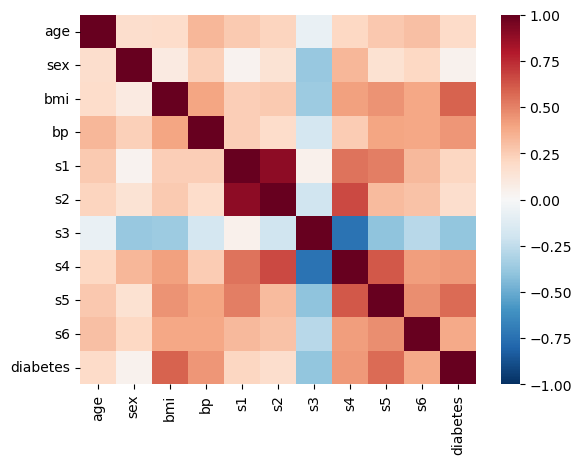

In [20]:
# Correlation matrix
df = pd.concat([X, pd.Series(y)], axis=1)
df = df.rename(columns={0:'diabetes'})

import seaborn as sns
_ = sns.heatmap(df.corr(), cmap="RdBu_r", vmin=-1, vmax=1)

From the above matrix we see that bmi (predictor) is strongly correlated to diabetes (response). As a predictor, bmi is strongly related to bp. To make a regression model we could take out bp without impacting the accuracy of the prediction of diabetes. This results in a simpler and smaller model.

In [57]:
# Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = X
variables.shape
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif[vif['VIF']>5]

,VIF,features
4,59.202510,s1
5,39.193370,s2
6,15.402156,s3
7,8.890986,s4
8,10.075967,s5


Leaving out the above columns should not impact the precision of prediction. But it results in a smaller and simpler model. Also, the std error and confidence interval of the coefficients should be smaller. But be careful, deleting all features with high collinearity, may lead to deleting the feature that is the best predictor for the response. So first check the correlation between features you want to delete and the (cor)relation with the response variable.

## Exercise 2: Linear regression prediction of house prices

The California housing market is booming and, as it is the home of silicon valley, the housing company **Homes4You** have decided they want to use new data science techniques to aid their business. They want you to build a predictive model that provides the median house price for each local area across the state (These local areas are often called *'blocks'*). They will use this to help guide their agents in how to price houses.

They have gathered a data set with numerous features to assist in building your model. However, they prefer to include as few features as possible to minimize the time their agents will spend collecting data in the future.


Your mission is to apply a regression model to predict housing prices in California.
* Import the data the company has collected using the sklearn function `fetch_california_housing`
* Make a heatmap of the correlation coefficients between the variables
* Split the data into a training and testing set
* Build a linear regression model using all the variables available and print the train and test MSE scores.
* Try building other models with different combinations of variables. Print the train and test MSE scores of at least 2 of these models.
* Provide a recommendation to Homes4You of which variables you would include in the model.
* Print the train and test **RMSE** scores of your final model and explain in a few sentences to Homes4You how well your model is performing. 

## Exercice 2 : Prédiction des prix immobiliers par régression linéaire

Le marché immobilier californien est en plein essor et, comme il s'agit du berceau de la Silicon Valley, la société immobilière **Homes4You** a décidé d'utiliser les nouvelles techniques de science des données pour soutenir son activité. Elle vous demande de créer un modèle prédictif qui fournisse le prix médian des maisons pour chaque zone locale de l'État (ces zones locales sont souvent appelées *« blocs »*). Elle utilisera ce modèle pour aider ses agents à fixer le prix des maisons.

Elle a rassemblé un ensemble de données comportant de nombreuses caractéristiques pour vous aider à construire votre modèle. Cependant, elle préfère inclure le moins de caractéristiques possible afin de réduire au minimum le temps que ses agents passeront à collecter des données à l'avenir.

Votre mission consiste à appliquer un modèle de régression pour prédire les prix de l'immobilier en Californie.
* Importez les données collectées par l'entreprise à l'aide de la fonction sklearn « fetch_california_housing ».
* Créez une carte thermique des coefficients de corrélation entre les variables.
* Divisez les données en un ensemble d'apprentissage et un ensemble de test.
* Construisez un modèle de régression linéaire à l'aide de toutes les variables disponibles et imprimez les scores MSE d'apprentissage et de test.
* Essayez de construire d'autres modèles avec différentes combinaisons de variables. Imprimez les scores MSE d'entraînement et de test d'au moins deux de ces modèles.
* Fournissez à Homes4You une recommandation sur les variables que vous incluriez dans le modèle.
* Imprimez les scores RMSE d'entraînement et de test de votre modèle final et expliquez en quelques phrases à Homes4You les performances de votre modèle. 
    

In [47]:
#### your solution here

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names[0:6])

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


In [ ]:
## Correlation Matrix
df = pd.DataFrame(housing, columns=housing.feature_names)
df["target"]= housing.target
corr_matrix = df.corr()
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)


        target
target     1.0


In [52]:
print(corr_matrix["target"].sort_values(ascending=False))


target    1.0
Name: target, dtype: float64


(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


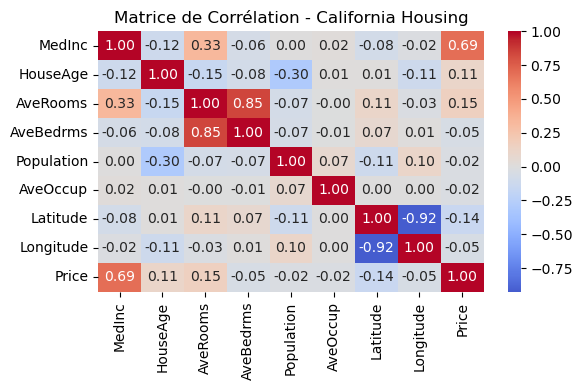

In [1]:
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
 
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names[0:6])

df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['Price'] = housing.target

plt.figure(figsize=(6, 4))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matrice de Corrélation - California Housing')
plt.tight_layout()
plt.show()


#### Divisez les données en un ensemble d'apprentissage et un ensemble de test.

Pour diviser les données en un ensemble d'apprentissage et un ensemble de test, une approche courante consiste à effectuer une répartition aléatoire des données disponibles en deux groupes distincts : l'ensemble d'apprentissage, utilisé pour entraîner le modèle, et l'ensemble de test, utilisé pour évaluer ses performances.
 Cette division permet d'estimer dans quelle mesure le modèle se généralise à des données invisibles et fournit une estimation fiable de ses performances.

In [15]:
housing = fetch_california_housing()
X = housing.data
y = housing.target

print("Forme de l'ensemble de données:", X.shape, "Forme de la cible:", y.shape)
print("Noms des variables:", housing.feature_names)
print()
# Diviser en ensembles d'apprentissage et de test (80-20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

print("Taille de l'ensemble d'apprentissage:", X_train.shape[0])
print("Taille de l'ensemble de test:", X_test.shape[0])
print("\n" + "="*70)

# Modèle 1: Toutes les variables
print("\nMODÈLE 1: Toutes les variables")
print("-" * 70)
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train, y_train)

y_train_pred1 = model1.predict(X_train)
y_test_pred1 = model1.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error
mse_train1 = mean_squared_error(y_train, y_train_pred1)
mse_test1 = mean_squared_error(y_test, y_test_pred1)

print(f"MSE d'apprentissage: {mse_train1:.6f}")
print(f"MSE de test: {mse_test1:.6f}")
print(f"Indicateur de surapprentissage (Test - Train): {mse_test1 - mse_train1:.6f}")

# Modèle 2: Variables sélectionnées (RevenuMed, AgeHab, NbPiècesMoy, NbChambMoy)
print("\n" + "="*70)
print("\nMODÈLE 2: Variables sélectionnées (RevenuMed, AgeHab, NbPiècesMoy, NbChambMoy)")
print("-" * 70)
variables_selectionnees2 = [0, 1, 2, 3]  # RevenuMed, AgeHab, NbPiècesMoy, NbChambMoy
X_train2 = X_train[:, variables_selectionnees2]
X_test2 = X_test[:, variables_selectionnees2]

model2 = LinearRegression()
model2.fit(X_train2, y_train)

y_train_pred2 = model2.predict(X_train2)
y_test_pred2 = model2.predict(X_test2)

mse_train2 = mean_squared_error(y_train, y_train_pred2)
mse_test2 = mean_squared_error(y_test, y_test_pred2)

print(f"MSE d'apprentissage: {mse_train2:.6f}")
print(f"MSE de test: {mse_test2:.6f}")
print(f"Indicateur de surapprentissage (Test - Train): {mse_test2 - mse_train2:.6f}")

# Modèle 3: Variables géographiques (RevenuMed, AgeHab, Latitude, Longitude)
print("\n" + "="*70)
print("\nMODÈLE 3: Variables géographiques (RevenuMed, AgeHab, Latitude, Longitude)")
print("-" * 70)
variables_selectionnees3 = [0, 1, 4, 5]  # RevenuMed, AgeHab, Latitude, Longitude
X_train3 = X_train[:, variables_selectionnees3]
X_test3 = X_test[:, variables_selectionnees3]

model3 = LinearRegression()
model3.fit(X_train3, y_train)

y_train_pred3 = model3.predict(X_train3)
y_test_pred3 = model3.predict(X_test3)

mse_train3 = mean_squared_error(y_train, y_train_pred3)
mse_test3 = mean_squared_error(y_test, y_test_pred3)

print(f"MSE d'apprentissage: {mse_train3:.6f}")
print(f"MSE de test: {mse_test3:.6f}")
print(f"Indicateur de surapprentissage (Test - Train): {mse_test3 - mse_train3:.6f}")

# Résumé et recommandation
print("\n" + "="*70)
print("\nRÉSUMÉ DE LA COMPARAISON DES MODÈLES")
print("-" * 70)
resume_modeles = pd.DataFrame({
    'Modèle': ['Toutes les variables', 'Modèle 2 (4 variables)', 'Modèle 3 (4 variables)'],
    'MSE Apprentissage': [mse_train1, mse_train2, mse_train3],
    'MSE Test': [mse_test1, mse_test2, mse_test3],
    'Écart Surapprentissage': [mse_test1 - mse_train1, mse_test2 - mse_train2, mse_test3 - mse_train3]
})
print(resume_modeles.to_string(index=False))

# Sélectionner le meilleur modèle (MSE de test le plus faible)
meilleur_mse = min(mse_test1, mse_test2, mse_test3)
if meilleur_mse == mse_test1:
    meilleur_modele = model1
    meilleures_variables = "Les 8 variables"
    meilleur_mse_train = mse_train1
    meilleur_mse_test = mse_test1
elif meilleur_mse == mse_test2:
    meilleur_modele = model2
    meilleures_variables = "RevenuMed, AgeHab, NbPiècesMoy, NbChambMoy"
    meilleur_mse_train = mse_train2
    meilleur_mse_test = mse_test2
else:
    meilleur_modele = model3
    meilleures_variables = "RevenuMed, AgeHab, Latitude, Longitude"
    meilleur_mse_train = mse_train3
    meilleur_mse_test = mse_test3

# Calculer l'RMSE pour le modèle final
rmse_apprentissage = np.sqrt(meilleur_mse_train)
rmse_test = np.sqrt(meilleur_mse_test)

print("\n" + "="*70)
print("\nRECOMMANDATION DE MODÈLE FINAL POUR HOMES4YOU")
print("-" * 70)
print(f"\nVariables du meilleur modèle: {meilleures_variables}")
print(f"\nRMSE d'apprentissage: {rmse_apprentissage:.6f}")
print(f"RMSE de test: {rmse_test:.6f}")

print("\n" + "-" * 70)
print("EXPLICATION DES PERFORMANCES POUR HOMES4YOU:")
print("-" * 70)


Forme de l'ensemble de données: (20640, 8) Forme de la cible: (20640,)
Noms des variables: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Taille de l'ensemble d'apprentissage: 16512
Taille de l'ensemble de test: 4128


MODÈLE 1: Toutes les variables
----------------------------------------------------------------------
MSE d'apprentissage: 0.517933
MSE de test: 0.555892
Indicateur de surapprentissage (Test - Train): 0.037958


MODÈLE 2: Variables sélectionnées (RevenuMed, AgeHab, NbPiècesMoy, NbChambMoy)
----------------------------------------------------------------------
MSE d'apprentissage: 0.610274
MSE de test: 0.643568
Indicateur de surapprentissage (Test - Train): 0.033294


MODÈLE 3: Variables géographiques (RevenuMed, AgeHab, Latitude, Longitude)
----------------------------------------------------------------------
MSE d'apprentissage: 0.647753
MSE de test: 0.659687
Indicateur de surapprentissage (Test - Train): 0.011934




NameError: name 'np' is not defined

If removing strongly collinear features doesn’t lead to a better model, you can also try different feature combinations (for example, the one below yields similar training and testing scores).

Si la suppression des caractéristiques fortement colinéaires ne permet pas d'obtenir un meilleur modèle, vous pouvez également essayer différentes combinaisons de caractéristiques (par exemple, celle ci-dessous donne des scores d'entraînement et de test similaires).

In [23]:
# Leave out these columns and then compute the training and testing MSE
to_drop = ['AveRooms', 'AveBedrms', 'Population', 'AveOccup']


**Task 3: Explain this to your neighbour...**
* The training and test errors are quite close. What does this mean? 



<details><summary>HINT</summary><br>
HINT: think in terms of if we were to apply this fitted model to new data the model has not seen.

</details>

* If your MSE & RMSE results are different to those of your peers (even when using the same features and model), why might this be? 



**Task 4:**
* Try to load the 'boston house price' (do some further research, what is the issue here?). 
* Try to load 'Linnerrud' data set that comes with sklearn? Try to build a model

**Tâche 3 : Expliquez ceci à votre voisin...**
* Les erreurs d'entraînement et de test sont assez proches. Qu'est-ce que cela signifie ?



<details><summary>INDICE</summary><br>
INDICE : réfléchissez en vous demandant ce qui se passerait si nous appliquions ce modèle ajusté à de nouvelles données que le modèle n'a pas encore vues.

</details>

* Si vos résultats MSE et RMSE sont différents de ceux de vos pairs (même en utilisant les mêmes caractéristiques et le même modèle), quelle pourrait en être la raison ? 



**Tâche 4 :**
* Essayez de charger les données « boston house price » (faites quelques recherches supplémentaires, quel est le problème ici ?). 
* Essayez de charger l'ensemble de données « Linnerrud » fourni avec sklearn. Essayez de construire un modèle.

**Tâche 3 : Expliquez ceci à votre voisin...**
* Les erreurs d'entraînement et de test sont assez proches. Qu'est-ce que cela signifie ?



<details><summary>INDICE</summary><br>
INDICE : réfléchissez en vous demandant ce qui se passerait si nous appliquions ce modèle ajusté à de nouvelles données que le modèle n'a pas encore vues.

</details>

* Si vos résultats MSE et RMSE sont différents de ceux de vos pairs (même en utilisant les mêmes caractéristiques et le même modèle), quelle pourrait en être la raison ? 



**Tâche 4 :**
* Essayez de charger les données « boston house price » (faites quelques recherches supplémentaires, quel est le problème ici ?). 
* Essayez de charger l'ensemble de données « Linnerrud » fourni avec sklearn. Essayez de construire un modèle.


## To summarize

* Several metrics can be used to measure the accuracy of predictions, such as:
> - Mean Squared Error (MSE), which penalizes larger errors more heavily.
> - Root Mean Squared Error (RMSE) : the square root of MSE, providing results in the original units of Y.
> - Mean Absolute Error (MAE), which gives the average magnitude of errors without squaring.

* The data is typically split into:
> - A training set (usually 75% or 80% of the data), used to fit the model.
> - A testing set (the remaining 20% or 25%), consisting of unseen data to evaluate the model’s ability to generalize to new observations.

* Comparing training MSE (low) and test MSE (higher) helps detect overfitting. A small gap indicates good generalization.

* Tools like correlation matrices and Variance Inflation Factor (VIF > 5) identify redundant features, enabling simpler, more stable models.

